In [22]:
from src.FaceTracker import FaceTracker
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [15]:
input_video_filepath = "/dataset/Web_Videos/pexels-kampus-production-8774689 (720p).mp4"
output_video_filepath = "/output/tracked.mp4"
svm_classifier_filepath = "/output/svm_classifier.pkl"
batch_size = 32

In [16]:
# Load the face tracker
face_tracker = FaceTracker(svm_classifier_filepath)
face_tracker.reinit_face_db()

In [17]:
# Read the video
video_frames = face_tracker.read_video(input_video_filepath)

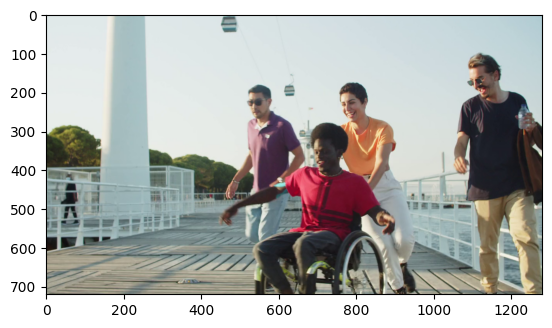

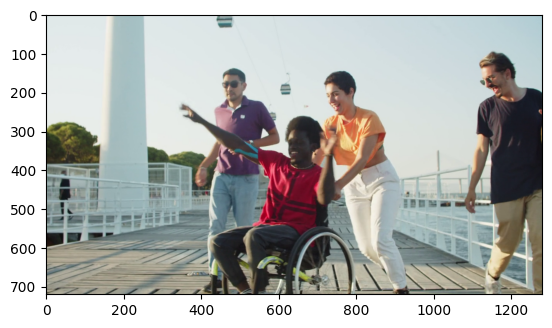

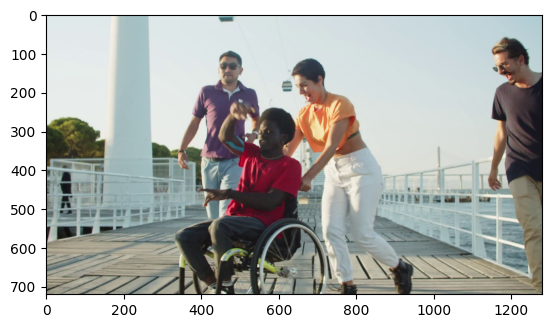

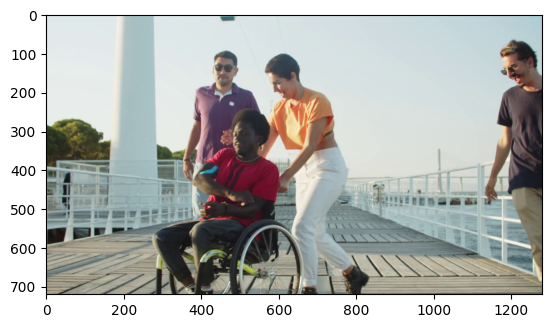

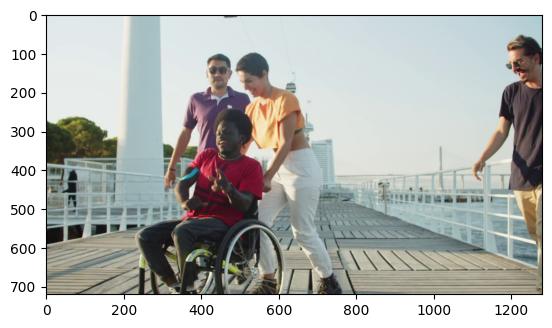

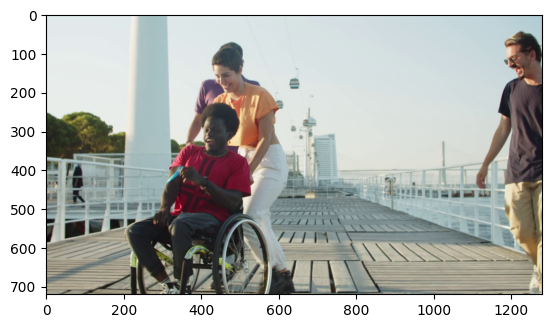

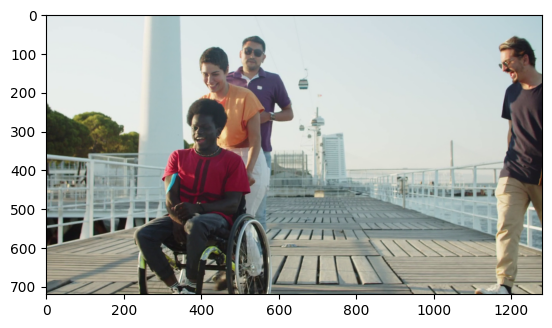

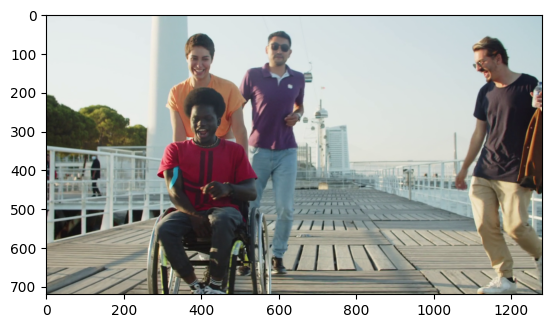

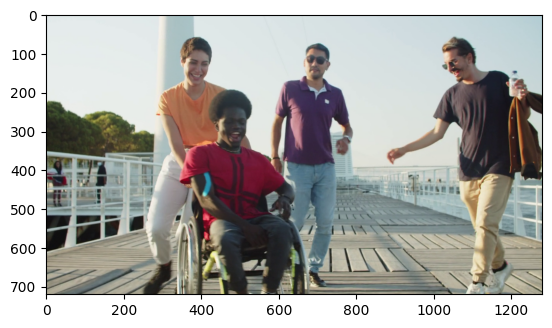

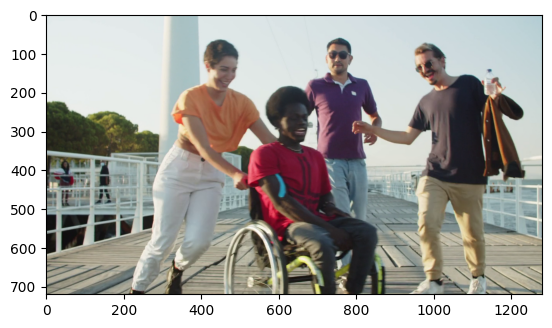

In [28]:
# Select some frames of the original video, and print them
skip_frame = 10
nb_frame_to_print = 10
video_batch = []
for i in range(nb_frame_to_print):
    frame = video_frames[i*skip_frame]
    video_batch.append(frame)
    plt.imshow(frame)
    plt.show()

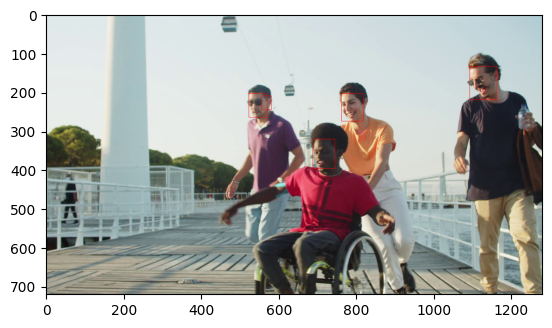

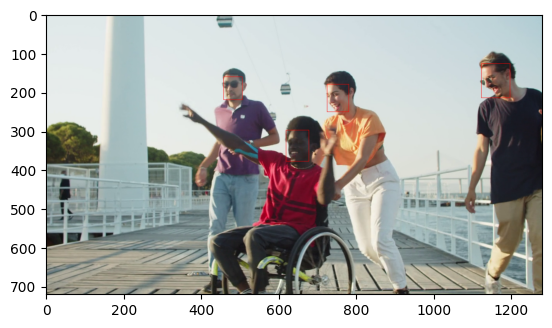

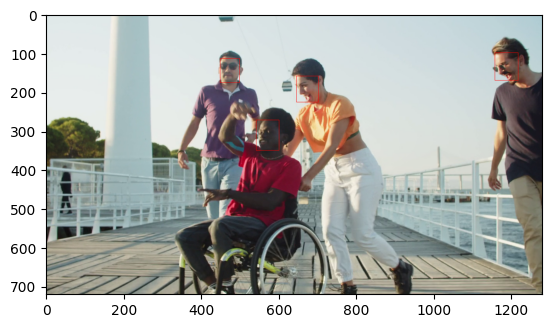

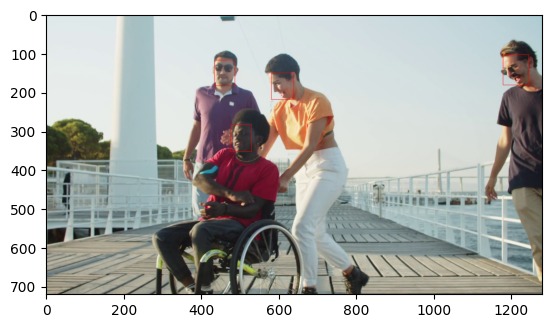

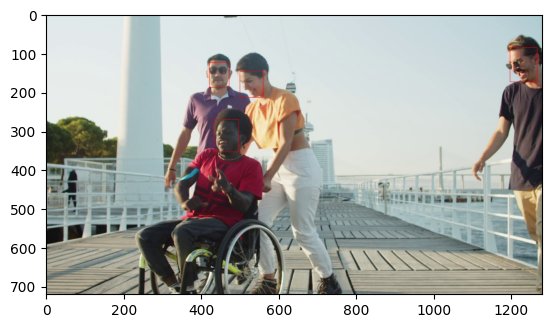

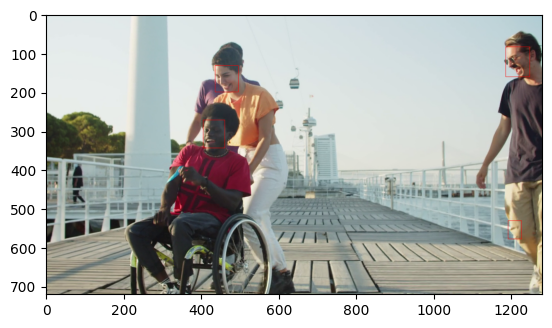

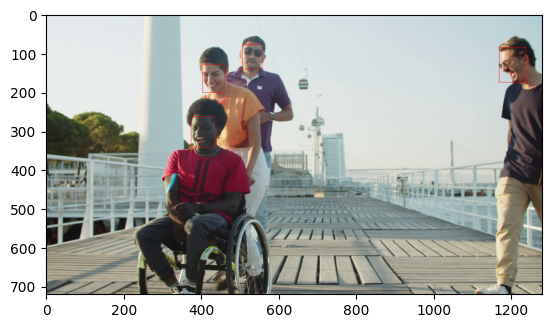

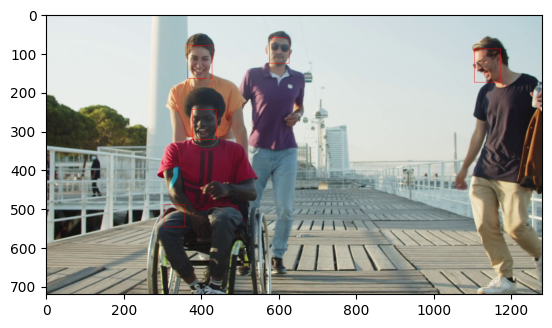

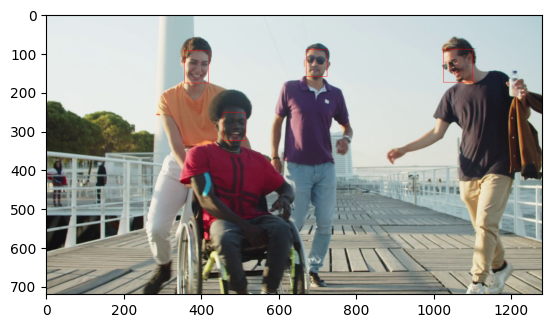

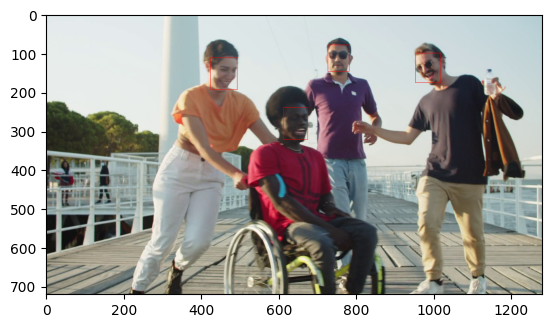

In [31]:
# Detect the faces
boxes_found = face_tracker.detect_faces(video_batch)
new_video = face_tracker.rectangle_detected_faces(video_batch, boxes_found)

for frame in new_video:
    plt.imshow(frame)
    plt.show()

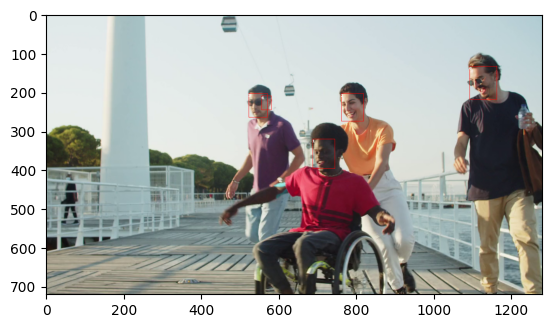

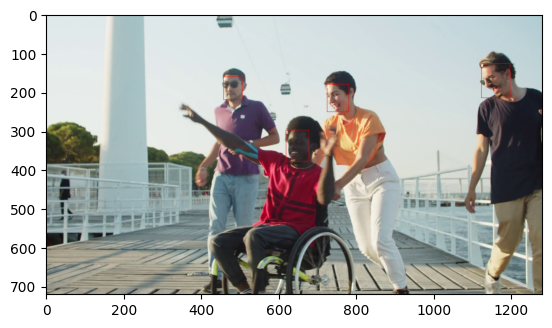

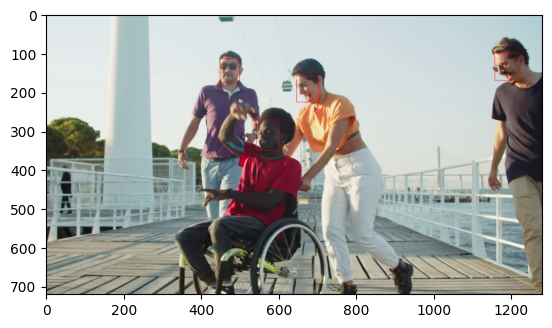

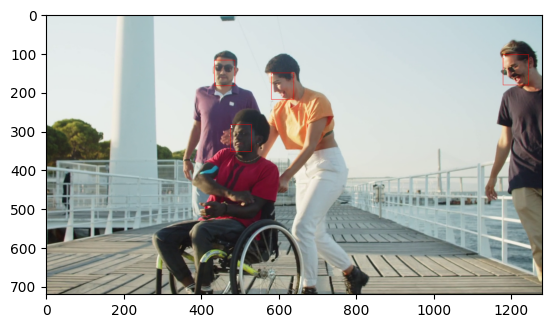

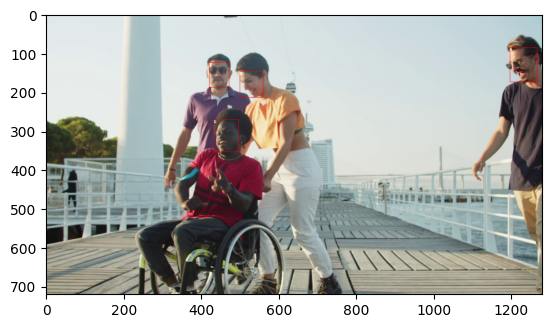

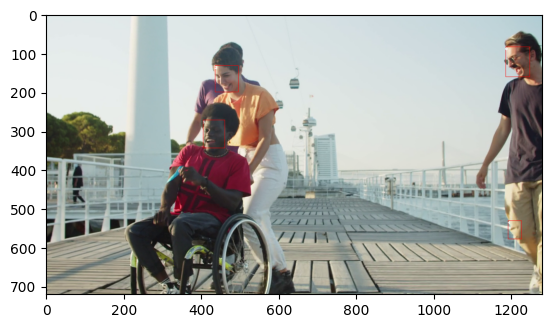

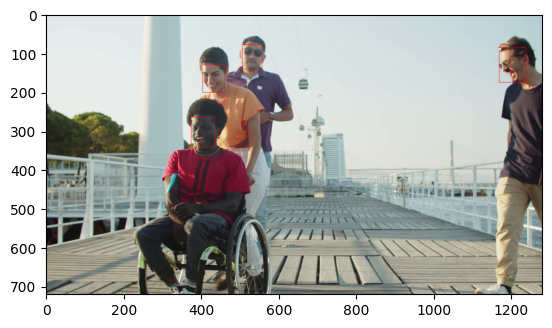

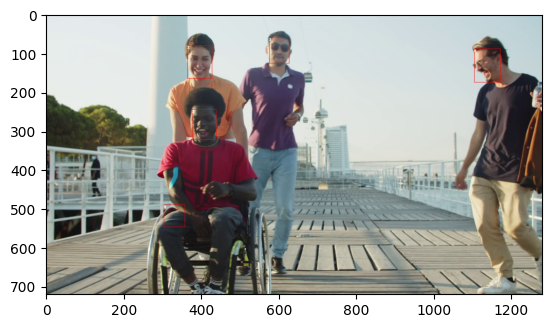

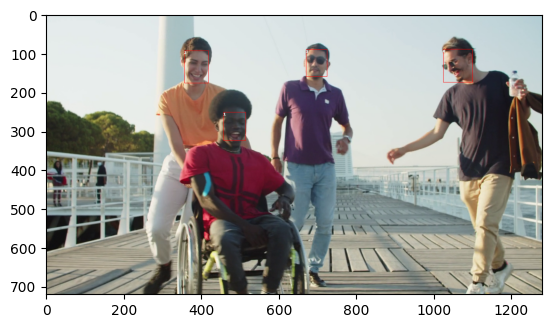

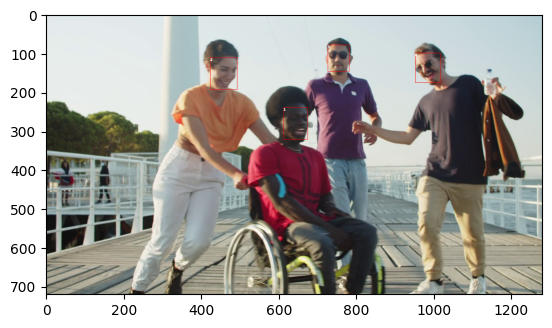

In [32]:
# Assign an identity to each of the detected faces
found_ids = face_tracker.identify(video_batch, boxes_found)
new_video = face_tracker.rectangle_detected_faces(video_batch, boxes_found, found_ids)

for frame in new_video:
    plt.imshow(frame)
    plt.show()

In [27]:
# Find the number of batches needed to process the whole video
if len(video_frames) % batch_size == 0:
    nb_batches = int(len(video_frames) / batch_size)
else:
    nb_batches = int(len(video_frames) / batch_size) + 1

# Perform face tracking + identification
new_video = []
for batch_index in tqdm(range(nb_batches)):
    video_batch = video_frames[batch_index*batch_size:(batch_index+1)*batch_size]
    
    # Detect the faces
    boxes_found = face_tracker.detect_faces(video_batch)

    # Assign an identity to each of the detected faces
    found_ids = face_tracker.identify(video_batch, boxes_found)

    # Put a square around the detected faces and write their ID
    new_video.extend(face_tracker.rectangle_detected_faces(video_batch, boxes_found, found_ids))

face_tracker.write_video(np.array(new_video), output_video_filepath)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:31<00:00, 15.24s/it]


In [33]:
from IPython.display import Video
Video(output_video_filepath)